# DATA ANALYTICS GRADUATE CAPSTONE — D214 TASK 2  

Jason Smith   
Student ID: 293963   
jsmi268@wgu.edu   
WGU – MSDA    
Program Mentor: Christiana Okhipo  
Instructor: Daniel Smith  

# Research Question
 
A.  Summarize the original real-data research question you identified in task 1. Your summary should include justification for the research question you identified in task 1, a description of the context in which the research question exists, and a discussion of your hypothesis.

This analysis will use the Abalone Dataset from Kaggle(Mendes, 2018).

This analysis will attempt to answer the following question:
*Can the age of an abalone be predicted based on an abalone’s 'Sex', 'Diameter', and 'Whole weight'? 

The age of an abalone is currently determined by shucking and cutting the shell then counting the number of growth rings contained in the shell.  Shucking the abalone shell kills the animal.  The purpose of this analysis is to accurately determine the age of an abalone without killing it. 

The working hypothesis is the variables 'Sex', 'Diameter' and 'Whole weight' statistically significantly affect the variable 'Age'.

As an abalone gets older it grows additional growth rings which should reflect an increase in shell diameter and weight of the animal. 



## Data Collection

This analysis will use the Abalone Dataset from Kaggle(Mendes, 2018). The advantages of using this data is that it is readily available and free to use.  Furthermore, this dataset contains 4,177 rows of data which should be sufficient to show trends in size and weight in relation to an abalone's age. 

There are a few disadvantages with the provided data. These disadvantages include it does not track weather, location, or the amount of food resources which could affect the abalone's size and weight.  I believe a Random Forest algorithm may be able to determine the true age.


The values for diameter and whole weight were recorded in millimeters. These two features were scaled by dividing each value by 200(UCI). The scaled data values are used for this analysis. 

Rings are recorded is whole integer value.  The age is calculated by adding 1.5 to the ring value.

## Data Extraction and Preparation

The required python libraries are imported. 

In [3]:


# import Libraries

# Pandas -  supports ability to create dataframes and multi-dimensional arrays
import pandas as pd

# Numpy - Used to create error curves which helped to determine an ideal K-value. Used in section D2
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Test train split
from sklearn.model_selection import train_test_split

# Random forest
from sklearn.ensemble import RandomForestRegressor

# Display preferences
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)

C:\Users\smith\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The Abalone dataset was downloaded in CSV format from Kaggle then imported into a Panda dataframe using the Panda read_csv function.

In [5]:
# Import Data
df = pd.read_csv('abalone.csv')

In [6]:
# Create an original dataset for later reference
df_orig = df

The shape function was used to determine the number of rows and columns in the dataframe. Not all of the columns will be needed for this analysis, and these columns will be dropped soon. The original dataset has 4,177 rows and 9 columns. 

In [7]:
# Determine the number of rows and columns
rows= df.shape[0]
cols= df.shape[1]
print(f'The number of rows is: {rows}, and the number of columns is: {cols}')

The number of rows is: 4177, and the number of columns is: 9


The columns that are no longer required for the analysis are filtered out of the dataframe.

In [8]:
# Remove unnecessary columns
df = df[['Sex', 'Diameter', 'Whole weight', 'Rings']]

The true age of the abalone is calculate by adding 1.5 to the 'Rings' value.

In [9]:
# Calculate age by adding 1.5 to the ring value
df['Age'] = df['Rings'] + 1.5

<ipython-input-9-8cb1dbd2e995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Rings'] + 1.5


Now that we added the age to the dataframe, we can drop Rings because it is no longer required. The Sex column was also removed because the Random Forest alghorithm only accepts features that have numeric datatypes. 

In [10]:
# Remove Rings column
df = df[['Diameter', 'Whole weight', 'Age']]

Now that the other weight columns have been dropped, the column 'Whole weight' has been renamed to 'Weight' for ease of use. In addition, the head function was used to see the first 5 rows of the dataframe and to confirm only the required columns appear in the dataframe.


In [11]:
# Rename whole weight column
df.columns = ['Diameter', 'Weight', 'Age']

# Print first 5 rows
print(df.head())

   Diameter  Weight   Age
0     0.365  0.5140  16.5
1     0.265  0.2255   8.5
2     0.420  0.6770  10.5
3     0.365  0.5160  11.5
4     0.255  0.2050   8.5


The Panda shape function is used to determine the number of rows and columns present in a dataframe. The number of rows remained the same while the number of columns dropped from nine to three. 

In [9]:
# Recheck number of rows and columns
rows= df.shape[0]
cols= df.shape[1]
print(f'The number of rows is: {rows}, and the number of columns is: {cols}')

The number of rows is: 4177, and the number of columns is: 3


The Panda isnull function is used to check if any NULL values exist. No NULL values exist in the dataset. See below

In [10]:
# Check for null values
df.isnull().sum()

Diameter    0
Weight      0
Age         0
dtype: int64

The duplicated function was used to check for duplicate values. This function was run against the original dataset. No duplicate rows were detected.  

In [11]:
# Check for duplicate values against the original dataset
df_orig.duplicated().sum()

0

As mentioned, the Random Forest alghorithm only accepts numeric features as input.  The dtypes function was used to verify the dataypes are correct.  

In [12]:
# Check datatypes
df.dtypes
    

Diameter    float64
Weight      float64
Age         float64
dtype: object

## Analysis

The initial goal of this analysis is to determine whether the 'Sex', 'Diameter', and 'Weight' can be used to determine the age of an abolone.  A Random Forest Regression will be used to help answer this question.  However, this algorithm only accepts numeric features as input variables.  For this reason, the feature 'Sex' was dropped. The features d'Diameter' and 'Weight' will be used to predict an age of an abalone. 

Prior to performing the regression, the data will be explored through further analysis and visualizations. 

The Pandas describe function was used to output basic statistics including count, mean, std, max, etc...

In [13]:
# Basic statistics on numberic attributes
stats = df.describe()
stats


,Diameter,Weight,Age
count,4177.000000,4177.000000,4177.000000
mean,0.407881,0.828742,11.433684
std,0.099240,0.490389,3.224169
min,0.055000,0.002000,2.500000
25%,0.350000,0.441500,9.500000
50%,0.425000,0.799500,10.500000
75%,0.480000,1.153000,12.500000
max,0.650000,2.825500,30.500000


In [2]:
df.dtypes

NameError: name 'df' is not defined

In [24]:
# Determine mean and std values

#weight
meanw =stats.iloc[1, 1]
stdw = stats.iloc[2, 1]

# Diameter
meand = stats.iloc[1, 0]
stdd = stats.iloc[2, 0]

# Age
meana = stats.iloc[1, 2]
stda = stats.iloc[2, 2]

The hist function was used to create histogramThe distribution of the three numeric features is somewhat normally distributed. Diameter has a slight skew to the left whil weight and age are slightly skewed to the right. Normally distributed data typically performs better in regression analysis. 

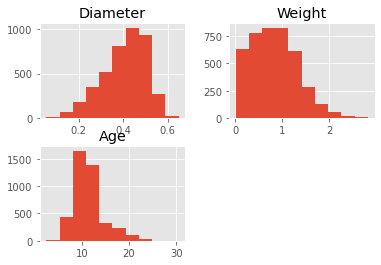

In [14]:
# histograms of continuous variables
plt.style.use('ggplot')
df.hist()
#save figure to file
# plt.savefig('univ_hist.jpg')
# plt.tight_layout()
plt.show()

The following box plot also echoes the non-normal distribution of the histograms.  All three attributes contain outliers.  Diameter at the lower scale range, Weight at the upper range and Age at both upper and lower. 

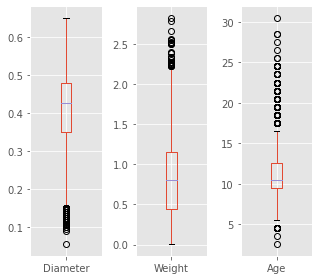

In [15]:
#  Create box plots
df[['Diameter', 'Weight', 'Age']].plot(kind='box', subplots=True, layout=(1,4), sharex=False,sharey=False)
plt.savefig('univ_box.jpg')
plt.tight_layout()


A correlation table and a correlation matrix are displayed below.  Both the table and matrix display how closely correlated two features are to one another.  
Closely related features will have a table value close to 1.0 and a matrix color that registers high on the spectrum (beige or brown).
 You can see the table value for Diameter and Weight is 0.925 and the matrix color is brown. These two variables are highly correlated. 

Conversely, there is not a strong correlation between Diameter and Age nor with Weight and Age.  Their relative correlation values are 0.57 and 0.543, and the matrix color is black which indicates a low correlation.  

The desire is to have a high level of correlation between one or more feature and the explanatory variable. Unfortunately, the abalone data has a correlation of 0.57 between Diameter & Age and a correlation of 0.54 between weight & Age. Both of which register in the black for the correlation matrix. 

In [16]:
# Create a correlation table
corrmat2 =df.corr()
corrmat2

,Diameter,Weight,Age
Diameter,1.000000,0.925452,0.57466
Weight,0.925452,1.000000,0.54039
Age,0.574660,0.540390,1.00000


Text(0.5, 1.0, 'Correlation Matrix')

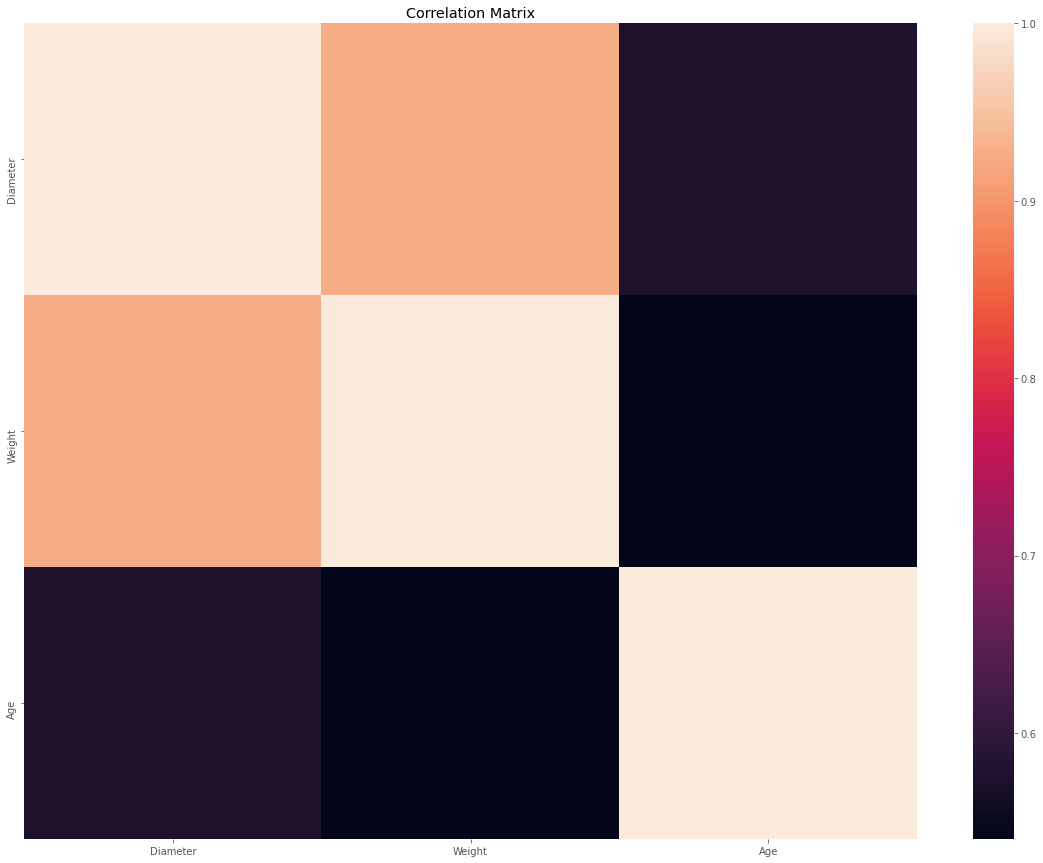

In [17]:
# Create a correlation matrix

plt.subplots(figsize=(20,15))
sns.heatmap(corrmat2)
# Variablesplt.subplots(figsize=(20,15))
#sns.heatmap(corrmat2, vmax=1., square=False).xaxis.tick_bottom()  
#plt.xticks(rotation=90)
plt.title('Correlation Matrix')

The data will be split into 70% train and 30% test datasets using the sklearn.model_selection train_test_split function.  Then the Random Forest class will then be trained against the train data and tested against the test data. 

In [18]:
# Create arrays for for the dependent variable ('y') and features('X')
X = df.drop('Age', axis = 1) 
y = df['Age']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Check the number of rows and columns
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (2923, 2)
Shape of y_train: (2923,)
Shape of X_test: (1254, 2)
Shape of y_test: (1254,)


Random Forest Regressor function was chosed over the Random Forest Classification because the explanatory variable is numeric.  This regression function will be trained against the training data then the model will tested against the testing data. 

In [20]:
# from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest tree
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

A new dataframe will be created for the purpose of storing and comparing actual data versus predicted. 

In [21]:
# Predict the price
y_pred = regressor.predict(X_test)

# Create dataframe of actual vs. predicted
rfdf = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
rfdf

,Actual,Predicted
668,14.5,10.587017
1580,9.5,10.086833
3784,12.5,11.660143
463,6.5,5.970714
2615,13.5,13.800000
...,...,...
1052,13.5,13.221000
3439,9.5,8.899367
1174,10.5,10.897000
2210,19.5,13.558000


Check the difference between the actuas and predicted values. The means-squared error will be compared to the mean.  As you see below the mean-squared error is less than 30% of the mean. We can see some predictive ability in this modelwith lots of room for improvement

In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.108957469632529
Mean Squared Error: 8.31225407247274
Root Mean Squared Error: 2.8830979991101136


The mean-squared error can be compared against the mean to determine the standard error

In [25]:
mse =  metrics.mean_squared_error(y_test, y_pred)
print("Mean age: ", round(meana, 2))

print("Mean-squared error: ", round(mse, 2))

# How does the mean squared error relate to the mean
print('The standard error is', round(abs((meana -mse)/meana) * 100, 2),'% of the mean value')


Mean age:  11.43
Mean-squared error:  8.31
The standard error is 27.3 % of the mean value


Accuracy will be calculated using the following formula
Accuracy = 100% - Error Rate 
Error Rate  = |Observed Value - Actual Value|/Actual Value × 100 

In [26]:
#  Calculate the error rate
error_rate = abs(y_pred -y_test)

# Mean absolute error 
mabs= 100 * (error_rate / y_test)

# Accuract
accuracy = round(100 - np.mean(mabs), 2)

print("Accuracy: ", accuracy,'%')

Accuracy:  81.87 %


The over all accuracy is approximately 82%.  This model does show some ability to predict the age of an abalone but is less than desired. 

C:\Users\smith\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\smith\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

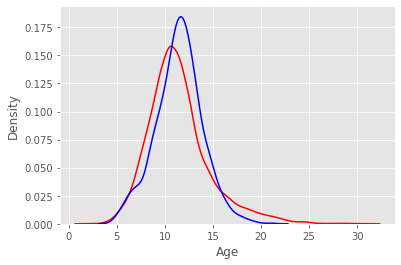

In [27]:
# Mute copy warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Plotting actual vs predicted
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

## Data summay and implications

The goal for this analysis is to develop a Random Forest Regression model that has a strong ability to predict the age of an abalone based on its diameter and weight. The dataset was acquired from Kaggle and origionally contains 9 columns and 4,177 rows of data.  Sklearn.model_selection was used to split the data into train and test.  The Sklearn.ensemble package was used to run the Random Forest Regression algorhithm. This model displayed an accuracy of 81.87%.  This value of accuracy demonstrates some ability to predict the age of an abalone but not to the desired level.  

The accuracy can likely be improved incramentaly several ways. The features Diameter and Weight both had weak correlations to Age.  Running a correlation matrix against the entire dataset may help locate other features with strong correlation values to Age.  
Hyper parameters tuning may improve accuracy as well.  These parameters include "n_estimators" and max_depth(Datascience Learner). 
Working with the stakehoders to increase the number of rows of data and including additional data points such as location and amount of food source may also help achieve better insight and accuracy. This is the least desirable of the options because it may only come with added costs and delay to this project.  

### Sources

## I. Third-Party Code Sources
1. RODOLFO MENDES (2018). Abalone Dataset
https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset
(MENDES, 2018)
2. Rodolfo Mendes(2018). Abalone Dataset.
https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset

3. Sofia Kapsiani & Brendan J. Howlin(Jul, 2021). Random forest classification for predicting lifespan-extending chemical compounds
https://www.nature.com/articles/s41598-021-93070-6

4. Cuemath. Accuracy Formula
https://www.cuemath.com/accuracy-formula/


## J. In-Line Sources
1. UCI. Abalone Data Set.
https://archive.ics.uci.edu/ml/datasets/abalone

2. Aditya Kumar (Jun, 2020).  Random Forest for prediction
https://towardsdatascience.com/random-forest-ca80e56224c1
(Kumar, 2020)

3. Data Science Learner. How to Improve Accuracy of Random Forest ? Tune Classifier In 7 Steps
https://www.datasciencelearner.com/how-to-improve-accuracy-of-random-forest-classifier/
(Datascience Learner)
